## Modelo PCA | Indicadores Fundamentalistas

In [650]:
import numpy as np
import pandas as pd
import scipy as sp
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn.decomposition import PCA
import datetime

In [651]:
thr = 1

In [652]:
str_dir = 'C:/Users/nelly/Desktop/Mestrado Insper/DISSERTAÇÃO/Dissertação/1. Modelo/'

In [653]:
str_pe_ratio_vale = 'PE_Ratio_Vale'

df_PE_Ratio_Vale = pd.read_csv(filepath_or_buffer = str_dir + str_pe_ratio_vale + '.csv', sep=';')
df_PE_Ratio_Vale.index = df_PE_Ratio_Vale['Data']
df_PE_Ratio_Vale = df_PE_Ratio_Vale.drop(columns=['Data'])
df_PE_Ratio_Vale = df_PE_Ratio_Vale.dropna()


df_PE_Ratio_Vale['indice']=np.zeros(len(df_PE_Ratio_Vale.index))

for x in range(0,len(df_PE_Ratio_Vale.index)):
    df_PE_Ratio_Vale.iloc[x,4] = datetime.datetime(df_PE_Ratio_Vale.iloc[x,2],df_PE_Ratio_Vale.iloc[x,1], df_PE_Ratio_Vale.iloc[x,0])
    

df_PE_Ratio_Vale = df_PE_Ratio_Vale.drop(columns=['Date', 'Month', 'Year'])
df_PE_Ratio_Vale.index = df_PE_Ratio_Vale['indice']
df_PE_Ratio_Vale = df_PE_Ratio_Vale.drop(columns=['indice'])

In [655]:
str_pb_ratio_vale = 'PB_Ratio_Vale'

df_PB_Ratio_Vale = pd.read_csv(filepath_or_buffer = str_dir + str_pb_ratio_vale + '.csv', sep=';')
df_PB_Ratio_Vale.index = df_PB_Ratio_Vale['Data']
df_PB_Ratio_Vale = df_PB_Ratio_Vale.drop(columns=['Data'])
df_PB_Ratio_Vale = df_PB_Ratio_Vale.dropna()

df_PB_Ratio_Vale['indice']=np.zeros(len(df_PB_Ratio_Vale.index))

for x in range(0,len(df_PB_Ratio_Vale.index)):
    df_PB_Ratio_Vale.iloc[x,4] = datetime.datetime(df_PB_Ratio_Vale.iloc[x,2],df_PB_Ratio_Vale.iloc[x,1], df_PB_Ratio_Vale.iloc[x,0])
    

df_PB_Ratio_Vale = df_PB_Ratio_Vale.drop(columns=['Date', 'Month', 'Year'])
df_PB_Ratio_Vale.index = df_PB_Ratio_Vale['indice']
df_PB_Ratio_Vale = df_PB_Ratio_Vale.drop(columns=['indice'])

In [656]:
str_ev_ebitda_vale = 'EV_EBITDA_Vale'

df_EV_EBITDA_Vale = pd.read_csv(filepath_or_buffer = str_dir + str_ev_ebitda_vale + '.csv', sep=';')
df_EV_EBITDA_Vale.index = df_EV_EBITDA_Vale['Data']
df_EV_EBITDA_Vale = df_EV_EBITDA_Vale.drop(columns=['Data'])
df_EV_EBITDA_Vale = df_EV_EBITDA_Vale.dropna()

df_EV_EBITDA_Vale['indice']=np.zeros(len(df_EV_EBITDA_Vale.index))

for x in range(0,len(df_EV_EBITDA_Vale.index)):
    df_EV_EBITDA_Vale.iloc[x,4] = datetime.datetime(df_EV_EBITDA_Vale.iloc[x,2],df_EV_EBITDA_Vale.iloc[x,1], df_EV_EBITDA_Vale.iloc[x,0])
    

df_EV_EBITDA_Vale = df_EV_EBITDA_Vale.drop(columns=['Date', 'Month', 'Year'])
df_EV_EBITDA_Vale.index = df_EV_EBITDA_Vale['indice']
df_EV_EBITDA_Vale = df_EV_EBITDA_Vale.drop(columns=['indice'])

In [657]:
str_ps_ratio_vale = 'PS_Vale'

df_PS_Ratio_Vale = pd.read_csv(filepath_or_buffer = str_dir + str_ps_ratio_vale + '.csv', sep=';')
df_PS_Ratio_Vale.index = df_PS_Ratio_Vale['Data']
df_PS_Ratio_Vale = df_PS_Ratio_Vale.drop(columns=['Data'])
df_PS_Ratio_Vale = df_PS_Ratio_Vale.dropna()

df_PS_Ratio_Vale['indice']=np.zeros(len(df_PS_Ratio_Vale.index))

for x in range(0,len(df_PS_Ratio_Vale.index)):
    df_PS_Ratio_Vale.iloc[x,4] = datetime.datetime(df_PS_Ratio_Vale.iloc[x,2],df_PS_Ratio_Vale.iloc[x,1], df_PS_Ratio_Vale.iloc[x,0])
    

df_PS_Ratio_Vale = df_PS_Ratio_Vale.drop(columns=['Date', 'Month', 'Year'])
df_PS_Ratio_Vale.index = df_PS_Ratio_Vale['indice']
df_PS_Ratio_Vale = df_PS_Ratio_Vale.drop(columns=['indice'])

In [658]:
str_ev_ebitda_petro = 'EV_EBITDA_Petro'

df_EV_EBITDA_Petro = pd.read_csv(filepath_or_buffer = str_dir + str_ev_ebitda_petro + '.csv', sep=';')
df_EV_EBITDA_Petro.index = df_EV_EBITDA_Petro['Data']
df_EV_EBITDA_Petro = df_EV_EBITDA_Petro.drop(columns=['Data'])
df_EV_EBITDA_Petro = df_EV_EBITDA_Petro.dropna()

df_EV_EBITDA_Petro['indice']=np.zeros(len(df_EV_EBITDA_Petro.index))

for x in range(0,len(df_EV_EBITDA_Petro.index)):
    df_EV_EBITDA_Petro.iloc[x,4] = datetime.datetime(df_EV_EBITDA_Petro.iloc[x,2],df_EV_EBITDA_Petro.iloc[x,1], df_EV_EBITDA_Petro.iloc[x,0])
    

df_EV_EBITDA_Petro = df_EV_EBITDA_Petro.drop(columns=['Date', 'Month', 'Year'])
df_EV_EBITDA_Petro.index = df_EV_EBITDA_Petro['indice']
df_EV_EBITDA_Petro = df_EV_EBITDA_Petro.drop(columns=['indice'])

In [659]:
str_ps_ratio_petro = 'PS_Petro'

df_PS_Ratio_Petro = pd.read_csv(filepath_or_buffer = str_dir + str_ps_ratio_petro + '.csv', sep=';')
df_PS_Ratio_Petro.index = df_PS_Ratio_Petro['Data']
df_PS_Ratio_Petro = df_PS_Ratio_Petro.drop(columns=['Data'])
df_PS_Ratio_Petro = df_PS_Ratio_Petro.dropna()

df_PS_Ratio_Petro['indice']=np.zeros(len(df_PS_Ratio_Petro.index))

for x in range(0,len(df_PS_Ratio_Petro.index)):
    df_PS_Ratio_Petro.iloc[x,4] = datetime.datetime(df_PS_Ratio_Petro.iloc[x,2],df_PS_Ratio_Petro.iloc[x,1], df_PS_Ratio_Petro.iloc[x,0])
    

df_PS_Ratio_Petro = df_PS_Ratio_Petro.drop(columns=['Date', 'Month', 'Year'])
df_PS_Ratio_Petro.index = df_PS_Ratio_Petro['indice']
df_PS_Ratio_Petro = df_PS_Ratio_Petro.drop(columns=['indice'])

In [660]:
str_pe_ratio_petro = 'PE_Ratio_Petro'

df_PE_Ratio_Petro = pd.read_csv(filepath_or_buffer = str_dir + str_pe_ratio_petro + '.csv', sep=';')
df_PE_Ratio_Petro.index = df_PE_Ratio_Petro['Data']
df_PE_Ratio_Petro = df_PE_Ratio_Petro.drop(columns=['Data'])
df_PE_Ratio_Petro = df_PE_Ratio_Petro.dropna()

df_PE_Ratio_Petro['indice']=np.zeros(len(df_PE_Ratio_Petro.index))

for x in range(0,len(df_PE_Ratio_Petro.index)):
    df_PE_Ratio_Petro.iloc[x,4] = datetime.datetime(df_PE_Ratio_Petro.iloc[x,2],df_PE_Ratio_Petro.iloc[x,1], df_PE_Ratio_Petro.iloc[x,0])
    

df_PE_Ratio_Petro = df_PE_Ratio_Petro.drop(columns=['Date', 'Month', 'Year'])
df_PE_Ratio_Petro.index = df_PE_Ratio_Petro['indice']
df_PE_Ratio_Petro = df_PE_Ratio_Petro.drop(columns=['indice'])

In [661]:
str_pb_ratio_petro = 'PB_Ratio_Petro'

df_PB_Ratio_Petro = pd.read_csv(filepath_or_buffer = str_dir + str_pb_ratio_petro + '.csv', sep=';')
df_PB_Ratio_Petro.index = df_PB_Ratio_Petro['Data']
df_PB_Ratio_Petro = df_PB_Ratio_Petro.drop(columns=['Data'])
df_PB_Ratio_Petro = df_PB_Ratio_Petro.dropna()

df_PB_Ratio_Petro['indice']=np.zeros(len(df_PB_Ratio_Petro.index))

for x in range(0,len(df_PB_Ratio_Petro.index)):
    df_PB_Ratio_Petro.iloc[x,4] = datetime.datetime(df_PB_Ratio_Petro.iloc[x,2],df_PB_Ratio_Petro.iloc[x,1], df_PB_Ratio_Petro.iloc[x,0])
    

df_PB_Ratio_Petro = df_PB_Ratio_Petro.drop(columns=['Date', 'Month', 'Year'])
df_PB_Ratio_Petro.index = df_PB_Ratio_Petro['indice']
df_PB_Ratio_Petro = df_PB_Ratio_Petro.drop(columns=['indice'])

In [665]:
indic_vale = pd.concat([df_PE_Ratio_Vale,df_PB_Ratio_Vale,df_EV_EBITDA_Vale,df_PS_Ratio_Vale],axis=1)

In [666]:
indic_petro = pd.concat([df_PE_Ratio_Petro,df_PB_Ratio_Petro,df_EV_EBITDA_Petro,df_PS_Ratio_Petro],axis=1)

In [667]:
zscores_vale = ((indic_vale-indic_vale.mean())/indic_vale.std()).dropna()

In [668]:
zscores_petro = ((indic_petro-indic_petro.mean())/indic_petro.std()).dropna()

In [669]:
n_comp = 2
pca = PCA(n_components=n_comp)
PCAFactors_vale = pd.DataFrame(index=zscores_vale.dropna().index,
                 columns=['PC' + str(x) for x in range(1,n_comp+1)],
                 data=pca.fit_transform(zscores_vale.dropna().values))

In [670]:
def pca_decomp(X, threshold):
    
    # Runs PCA for the maximum number of components possible
    n_series = X.shape[1]
    pca = PCA(n_components = n_series, svd_solver = 'full')
    pca.fit(X)
    
    # Selects the number of PCs required for explained variance > threshold
    total_var = 0
    n_comp = 0
    for var in pca.explained_variance_ratio_:
        total_var = var + total_var
        n_comp = n_comp + 1
        if total_var > threshold:
            break
    
    # Runs PCA for the number of components selected
    pca = PCA(n_components = n_comp, svd_solver = 'full')
    pca.fit(X)
    
    # Applies transformation to training data
    X_pca = pca.transform(X)
    X_pca = X_pca.reshape(X_pca.shape[0], n_comp)
    X_pca = pd.DataFrame(data = X_pca, 
                           index = X.index, 
                           columns = ["PC" + str(i) for i in np.arange(0,n_comp)])

    # Correlation matrix
    X_pca.corr()
    
    return X_pca

In [671]:
X_pca_vale = pca_decomp(indic_vale, thr)
X_pca_vale

,PC0,PC1,PC2,PC3
indice,,,,
2014-01-02,1347.296262,0.237011,0.419935,0.147902
2014-01-03,1303.796423,0.084465,0.349305,0.130673
2014-01-06,1315.996382,0.128772,0.336077,0.081138
2014-01-07,1279.496524,-0.013042,0.314817,0.105228
2014-01-08,1289.496490,0.025793,0.296384,0.067839
...,...,...,...,...
2020-08-10,-112.706315,1.609338,0.582691,0.161126
2020-08-11,-114.306019,1.356014,0.556937,0.240819
2020-08-12,-113.306205,1.517167,0.561430,0.166059


In [672]:
X_pca_petro = pca_decomp(indic_petro, thr)
X_pca_petro

,PC0,PC1,PC2,PC3
indice,,,,
2014-01-02,-8.533005,-7.128054,-0.224367,-0.084177
2014-01-03,-8.723426,-7.234854,-0.242405,-0.080216
2014-01-06,-8.629855,-7.164994,-0.235778,-0.086702
2014-01-07,-8.918509,-7.294633,-0.257564,-0.078553
2014-01-08,-8.819390,-7.280791,-0.256847,-0.079520
...,...,...,...,...
2020-08-10,-12.567153,-1.902702,0.595088,0.062042
2020-08-11,-12.558166,-1.993857,0.567200,0.061460
2020-08-12,-12.566794,-1.906302,0.595952,0.061002


In [673]:
str_ret_vale_petro = 'Ret_Vale_Petro'

df_Ret_Vale_Petro = pd.read_csv(filepath_or_buffer = str_dir + str_ret_vale_petro + '.csv', sep=';')
df_Ret_Vale_Petro.index = df_Ret_Vale_Petro['Data']
df_Ret_Vale_Petro = df_Ret_Vale_Petro.drop(columns=['Data'])
df_Ret_Vale_Petro = df_Ret_Vale_Petro.dropna()

df_Ret_Vale_Petro['indice']=np.zeros(len(df_Ret_Vale_Petro.index))

for x in range(0,len(df_Ret_Vale_Petro.index)):
    df_Ret_Vale_Petro.iloc[x,5] = datetime.datetime(df_Ret_Vale_Petro.iloc[x,2],df_Ret_Vale_Petro.iloc[x,1], df_Ret_Vale_Petro.iloc[x,0])
    
df_Ret_Vale_Petro = df_Ret_Vale_Petro.drop(columns=['Date', 'Month', 'Year'])
df_Ret_Vale_Petro.index = df_Ret_Vale_Petro['indice']
df_Ret_Vale_Petro = df_Ret_Vale_Petro.drop(columns=['indice'])

In [674]:
str_w_vale_petro = 'Vale_Petro_W'

df_vale_petro_w = pd.read_csv(filepath_or_buffer = str_dir + str_w_vale_petro + '.csv', sep=';')
df_vale_petro_w.index = df_vale_petro_w['Data']
df_vale_petro_w = df_vale_petro_w.drop(columns=['Data'])
df_vale_petro_w = df_vale_petro_w.dropna()

df_vale_petro_w['indice']=np.zeros(len(df_vale_petro_w.index))

for x in range(0,len(df_vale_petro_w.index)):
    df_vale_petro_w.iloc[x,5] = datetime.datetime(df_vale_petro_w.iloc[x,2],df_vale_petro_w.iloc[x,1], df_vale_petro_w.iloc[x,0])
    

df_vale_petro_w = df_vale_petro_w.drop(columns=['Date', 'Month', 'Year'])
df_vale_petro_w.index = df_vale_petro_w['indice']
df_vale_petro_w = df_vale_petro_w.drop(columns=['indice'])

In [675]:
mu = np.mean(df_Ret_Vale_Petro)*252

cov = df_Ret_Vale_Petro.cov()*252
print(cov)


           Ret VALE3  Ret PETR4
Ret VALE3   0.239074   0.130047
Ret PETR4   0.130047   0.304022


In [676]:
N_t = len(df_Ret_Vale_Petro.columns)

In [680]:
theta = np.zeros(4)
theta.shape

(4,)

In [686]:
x_t = np.array(pd.concat([X_pca_vale.iloc[0,:], X_pca_petro.iloc[0,:]], axis=1))
x_t.shape

(4, 2)

In [687]:
np.array(df_vale_petro_w.iloc[0,:])+((1/N_t)*(theta).dot(x_t))

array([0.5, 0.5])

In [688]:
(1/N_t)*(theta).dot(x_t)

array([0., 0.])

In [689]:
a = np.array(df_vale_petro_w.iloc[0,:])
a

array([0.5, 0.5])

In [690]:
(w_barra + (1/N_t)*(theta).dot(x_t)).dot(cov).dot((w_barra + (1/N_t)*(theta).dot(x_t)))

0.20079757772184326

In [691]:
w_barra = np.array(df_vale_petro_w.iloc[0,:])
(w_barra + (1/N_t)*(theta).dot(x_t)).sum() - 1

0.0

In [692]:
mu.max()

0.08325606323076909

In [705]:
def get_port(rp,mu,cov):
    
    theta0 = np.zeros(X_pca_vale.shape[1])
    
    x_t = np.array(pd.concat([X_pca_vale.iloc[0,:], X_pca_petro.iloc[0,:]], axis=1))
    
    w_barra = np.array(df_vale_petro_w.iloc[0,:])
    
    mean_variance = lambda theta : (w_barra + (1/N_t)*(theta).dot(x_t)).dot(cov).dot((w_barra + (1/N_t)*(theta).dot(x_t)))
    
    eq_cons = ({'type': 'eq', 'fun': lambda theta: (w_barra + (1/N_t)*(theta).dot(x_t)).sum() - 1},
               {'type': 'eq', 'fun': lambda theta: (w_barra + (1/N_t)*(theta).dot(x_t)).dot(np.array(mu)) - rp})
    
    res = opt.minimize(mean_variance, theta0, method='SLSQP', constraints = eq_cons)
    
    theta = pd.Series(data=res.x)
    
    w = w_barra + (1/N_t)*(theta).dot(x_t)

    return w, np.sqrt(res.fun)

In [706]:
rp = 0.06
theta0 = np.zeros(4)
    
x_t = np.array(pd.concat([X_pca_vale.iloc[0,:], X_pca_petro.iloc[0,:]], axis=1))
    
w_barra = np.array(df_vale_petro_w.iloc[0,:])
    
mean_variance = lambda theta : (w_barra + (1/N_t)*(theta).dot(x_t)).dot(cov).dot((w_barra + (1/N_t)*(theta).dot(x_t)))
    
eq_cons = ({'type': 'eq', 'fun': lambda theta: (w_barra + (1/N_t)*(theta).dot(x_t)).sum() - 1},
               {'type': 'eq', 'fun': lambda theta: (w_barra + (1/N_t)*(theta).dot(x_t)).dot(np.array(mu)) - rp})
    
res = opt.minimize(mean_variance, theta0, method='SLSQP', constraints = eq_cons)

In [707]:
res

     fun: 0.20845803654150424
     jac: array([ 2.34070806e+02, -1.61196020e+00,  2.15271749e-02,  6.38621673e-03])
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-0.00012296, -0.02391128, -0.00074292, -0.00027897])

In [708]:
np.sqrt((w_barra + (1/N_t)*(theta).dot(x_t)).dot(cov).dot((w_barra + (1/N_t)*(theta).dot(x_t))))

0.4481044272508845

C:\Users\nelly\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0.9891755016731619
0.8917577035790565
0.7977729312349717
0.7085885427203025
0.6262587496933308
0.5538488458273637
0.4957250165199938
0.45736666294146594
0.4439273148942788
0.4576077815770573
0.4961698570749308
0.5544460284709917
0.6269629091634371
0.7093664863985881
0.7986021238652853
0.892623169590881
0.9900672256825361
1.090016665076549
1.1918413442928792
1.2950990160208973
1.3994725277449511
1.504729689100944
1.6106972909300938
1.7172438106842192
1.8242678281938498


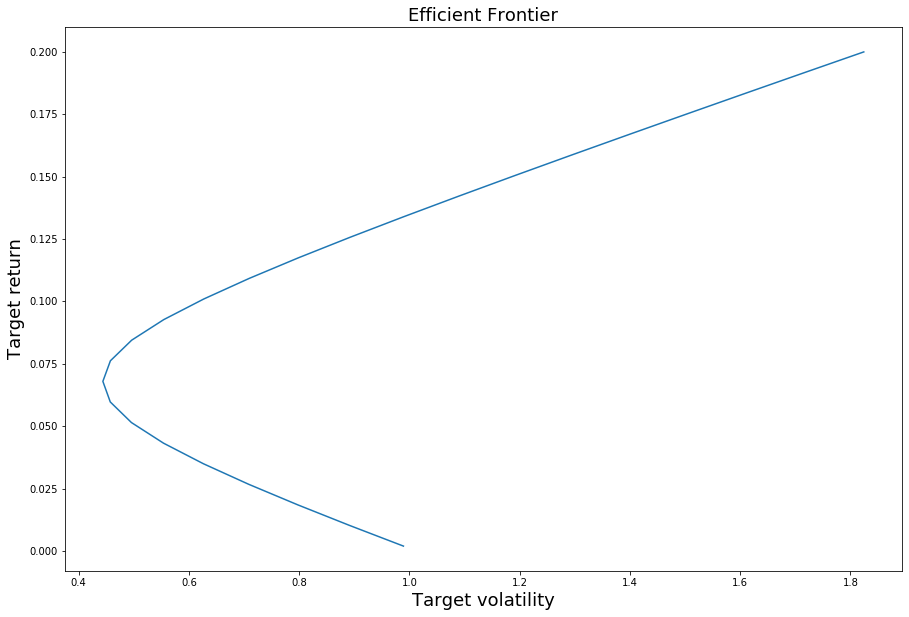

In [709]:
weights_df = pd.DataFrame()
frontier = pd.Series()

for rp in np.linspace(0.002, 0.20, 25):
    w, s = get_port(rp,mu,cov)
    print(s)
    weights_df = weights_df.append(pd.DataFrame(w.T))
    frontier[s] = rp
    
frontier.plot(figsize=(15,10))
plt.title('Efficient Frontier',fontsize=18)
plt.ylabel('Target return',fontsize=18)
plt.xlabel('Target volatility',fontsize=18)
plt.show()